# Task 3 : Evolution of Property in Singapore Over the Years

This notebook dives into an exploration of how the constructions of property in Singapore has evolved over the years, and their value in today's market.

### Setting up the Notebook

In [23]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
palette = sns.husl_palette(10)

from dataloader import read_csv
from preprocessing import DataPreprocessor

### Load Cleaned Dataset

In [21]:
trainX, trainY = read_csv('data/train.csv', ylabel='price')
testX, _ = read_csv('data/test.csv')

data_preprocessor = DataPreprocessor()
trainX, trainY = data_preprocessor.fit_transform(trainX, trainY)
testX = data_preprocessor.transform(testX)

df = pd.concat([trainX, trainY], axis=1)

# 1. Property Prices and Building Age

We compare the price of buildings in today's property market against their original built year.

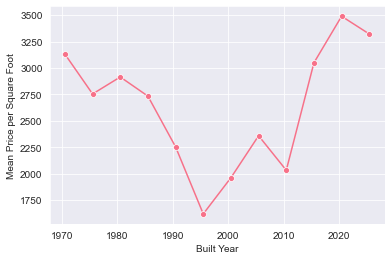

In [25]:
built_year, psf = df['built_year'], df['price']/df['size_sqft']

year_mid, psf_mean, num_units = [], [], []
year_range = (int(np.min(built_year)), int(np.max(built_year)))
for bin_st in range(year_range[0], year_range[1], 5):
    bin_end = bin_st + 5
    bin_index = (built_year < bin_end) & (built_year >= bin_st)
    num_units.append(np.sum(bin_index))
    year_mid.append((bin_st + bin_end)/2)
    psf_mean.append(np.mean(psf[bin_index]))
    
#### Remove the bin 1963-1968 as it contains only 48 units and skews the visualization for the rest of the trend
year_mid = year_mid[1:]
psf_mean = psf_mean[1:]

plt.figure(figsize=(6,4))
sns.lineplot({"Built Year": year_mid, "Mean Price per Square Foot": psf_mean}, 
             x="Built Year", y="Mean Price per Square Foot", marker='o', color=palette[0])

plt.show()

## Why are old properties so expensive?

We see an interesting trend in the figure above where the property prices of houses build in `1970s-1980s` is higher than that of properties built in `1990s-2000s`. The prices of new properties are again higher, thus further highlighting this dip for properties built in `1990s-2000s`.
We believe this is because of the government funded [House Improvement Programme (HIP)](https://www.hdb.gov.sg/residential/living-in-an-hdb-flat/sers-and-upgrading-programmes/upgrading-programmes/types/home-improvement-programme-hip).

HIP provides funds to renovate buildings that are 30-40 years old. The initiative was first launched by the Singapore government in 2007, for flats built up until 1986. This is exactly where the price suddenly drops in our graph! We believe that most old buildings have recently gone through renovation and thus are valued higher by the property market than building which are less old but haven't gone through their first renovation yet.

**That's neat! But why should anyone care?** In 2018, Singapore government extended HIP to include flats built between 1987 and 1997. We expect the prices of these units to go up in the next decade or so, and thus could be a good long-term investment.

# 2. Evolution of Property Size Over Time

We look into the evolution of property sizes in Singapore over time.

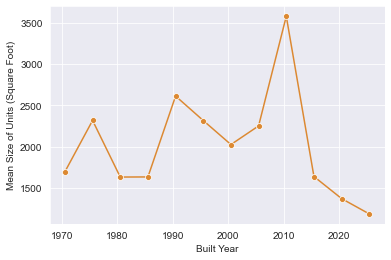

In [26]:
built_year, raw_size, num_beds = df['built_year'], df['size_sqft'], df['num_beds']

year_mid, size_mean, beds_mean, num_units = [], [], [], []
year_range = (int(np.min(built_year)), int(np.max(built_year)))
for bin_st in range(year_range[0], year_range[1], 5):
    bin_end = bin_st + 5
    bin_index = (built_year < bin_end) & (built_year >= bin_st)
    num_units.append(np.sum(bin_index))
    year_mid.append((bin_st + bin_end)/2)
    size_mean.append(np.mean(raw_size[bin_index]))
    beds_mean.append(np.mean(num_beds[bin_index]))
    
#### Remove the bin 1963-1968 as it contains only 48 units and skews the visualization for the rest of the trend
year_mid = year_mid[1:]
size_mean = size_mean[1:]
beds_mean = beds_mean[1:]

plt.figure(figsize=(6,4))
sns.lineplot({"Built Year": year_mid, "Mean Size of Units (Square Foot)": size_mean}, 
             x="Built Year", y="Mean Size of Units (Square Foot)", marker='o', color=palette[1])

plt.show()

## Property size has gone down significantly in the last 10 years!

With only a limited area and rising population density, Singapore is clearly facing issues with housing. The newly built properties have gone serious degradation in size as can be seen from the graph above. 

Moreover, as per [a recent move by the Urban Redevelopment Authority (URA)](https://www.ura.gov.sg/Corporate/Guidelines/Circulars/dc22-10) of Singapore, the government is focusing on providing strict limitations to the size of 1 bedroom units (also known as shoebox units). As of now, no such limitations exist for family units with 2-3 bedrooms or more.

The graph above focuses on the change in overall unit size over time. This, however, does not take into account the change in unit types (i.e., number of bedrooms), which we now do below.

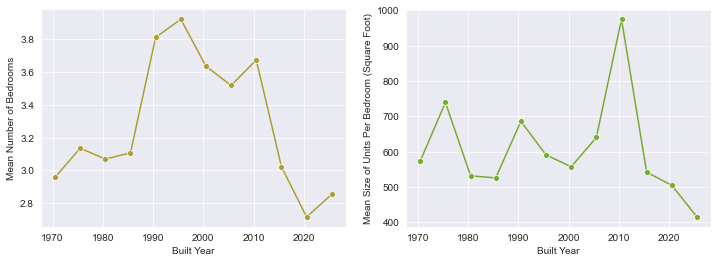

In [27]:
size_per_bedroom = [size/num_beds for (size, num_beds) in zip(size_mean, beds_mean)]

fig, axs = plt.subplots(ncols=2, figsize=(12,4))
sns.lineplot({"Built Year": year_mid, "Mean Number of Bedrooms": beds_mean}, 
             x="Built Year", y="Mean Number of Bedrooms", ax=axs[0], marker='o', color=palette[2])
sns.lineplot({"Built Year": year_mid, "Mean Size of Units Per Bedroom (Square Foot)": size_per_bedroom}, 
             x="Built Year", y="Mean Size of Units Per Bedroom (Square Foot)", ax=axs[1], marker='o', color=palette[3])

plt.show()

## Family size has also decreased over time

Interestingly enough, the mean number of bedrooms per unit have gone down over time in Singapore, which shows that the family size has gone down too, with more residents preferring 2-3 bedroom units.

To take into account the change in unit types, we calculate the mean size of units per bedroom across the years, and we still see the trend of decreasing size in the last 10 years.

**Clearly, the government needs to intervene with regulations on unit size, or else the housing in Singapore will soon get cramped and uncomfortable!**

# 3. Developing Areas

We plot the location of new building developments and the density of properties in Singapore.

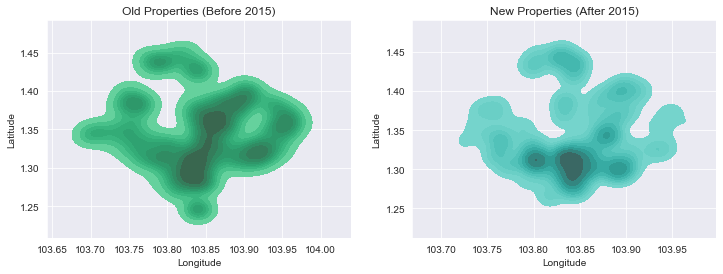

In [28]:
year_split = 2015
lat_old, lng_old = df[df['built_year']<year_split]['lat'], df[df['built_year']<year_split]['lng']
lat_new, lng_new = df[df['built_year']>=year_split]['lat'], df[df['built_year']>=year_split]['lng']

fig, axs = plt.subplots(ncols=2, figsize=(12,4))
sns.kdeplot({"Latitude": lat_old, "Longitude": lng_old}, 
             x="Longitude", y="Latitude", fill=True, ax=axs[0], 
             color=palette[4]).set(title=('Old Properties (Before %d)' % year_split))
sns.kdeplot({"Latitude": lat_new, "Longitude": lng_new}, 
             x="Longitude", y="Latitude", fill=True, ax=axs[1], 
             color=palette[5]).set(title=('New Properties (After %d)' % year_split))

plt.show()

## More concentrated developments in the last few years

Property development in singapore has gotten significantly concentrated in the last few years. While earlier development of housing in Singapore was more diverse across the island, new properties are mostly concetrated in Central Singapore.

**Unfortunately, this will saturate the area quickly, and shows us that the government and builders would soon need to find new areas for development!**

# 4. Tenure Left and Fears of Losing Property

We inspect the amount of years left in the lease of several homeowners and the fears of losing their property by not being able to resell.

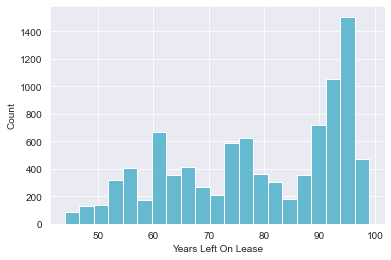

In [29]:
built_year, tenure_duration = df['built_year'], df['tenure_duration']

years_left_on_lease = np.array([dur - (2022 - yr) for (yr, dur) in zip(built_year, tenure_duration)])

#### Only Consider Properties With Dangers of Expiring Lease in the Next 100 Years
years_left_on_lease = years_left_on_lease[years_left_on_lease<100]

plt.figure(figsize=(6,4))
sns.histplot({"Years Left On Lease": years_left_on_lease}, 
             x="Years Left On Lease", color=palette[6])

plt.show()

## Smaller time left on property lease can create panic in absence of appropriate measures

As the property lease gets older and come closer to its expiry, it gets more and more difficult to resell the property and this can create panic among houseowners. This is because if the lease ends without any lease top-up or resell by the owners, the property will be returned back to the government.

As we can see, more and more houses are going to be at the brink of this panic in the next 20-30 years, and the government needs to provide reasonable assurances for these land owners to put a stop on any sudden drops in house prices.

Recently, Singapore government started the [Lease Buyback Scheme](https://www.hdb.gov.sg/residential/living-in-an-hdb-flat/for-our-seniors/monetising-your-flat-for-retirement/lease-buyback-scheme) which allows home owners with less 35 years left in their lease to sell back the lease to the government in advance while still enjoying living in those properties for another 30 years. Other similar schemes are necessary for the government to handle any sudden movements in the property market in future.